In [1]:
import random
import numpy as np
# import tensorflow
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
class Student:
    def __init__(self, choice):
        self.choice = choice
        self.policy_class = 0


class PolicyClassroom:
    def __init__(self, class_num):
        self.student = np.zeros(20)
        self.class_num = class_num
        self.diversity_list = []
        self.choice_list = []
        
    def add_student(self, choice):
        self.student[choice-1] += 1
        self.choice_list.append(choice)
        
        
    def diversity(self):
        sum = 0.0
        for choice in self.student:
            sum += choice
        diversity = 0.0
        for choice in self.student:
            diversity += choice ** 2 / sum ** 2
        self.diversity_list.append(diversity)
    
    def __repr__(self):
        return "班级" + str(self.class_num)
    
class LearningClassroom:
    def __init__(self):
        pass

In [25]:
class QLearning:

    def __init__(self):
        pass


In [26]:
from itertools import combinations

combins = [c for c in combinations(range(1, 7), 3)]
print("所有排列:")
print(combins)


def transform(student):
    return combins.index(student.choice) + 1

# s1 = Student(choice=(1,2,3))
# transform(s1)

所有排列:
[(1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 4, 5), (1, 4, 6), (1, 5, 6), (2, 3, 4), (2, 3, 5), (2, 3, 6), (2, 4, 5), (2, 4, 6), (2, 5, 6), (3, 4, 5), (3, 4, 6), (3, 5, 6), (4, 5, 6)]


In [27]:
def newPolicyClassroom(classNum):
    return PolicyClassroom(classNum)

def newPolicyClassrooms(totalNum):
    list = []
    for i in range(1,totalNum+1):
        list.append(newPolicyClassroom(i))
    return list
        
classroom_list = [classroom for classroom in newPolicyClassrooms(13)]
classroom_list

[班级1, 班级2, 班级3, 班级4, 班级5, 班级6, 班级7, 班级8, 班级9, 班级10, 班级11, 班级12, 班级13]

In [28]:
def generateRandomStudent():
    choice = random.randint(1,20)
    # 1 <= choice <= 20
    return choice

In [7]:
def generateRandomStudents(totalNum):
    student_list = []
    for num in range(totalNum):
        student_list.append(generateRandomStudent())
    return student_list

In [8]:
def addStudentToPolicyClassroom(student_list):
    for student in student_list:
        gotoClassroomNum = random.randint(1,13)
        # 1 <= gotoClassroomNum <= 13
        index = gotoClassroomNum - 1
        classroom_list[index].add_student(student)
        classroom_list[index].diversity()

In [9]:
students = generateRandomStudents(500)
addStudentToPolicyClassroom(students)

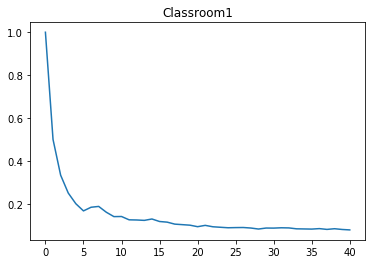

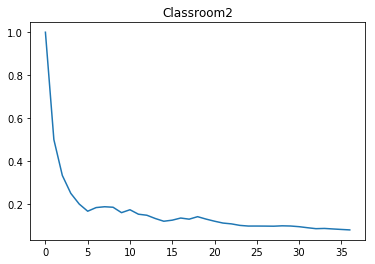

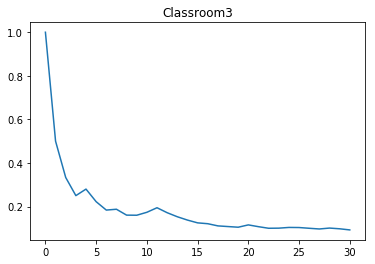

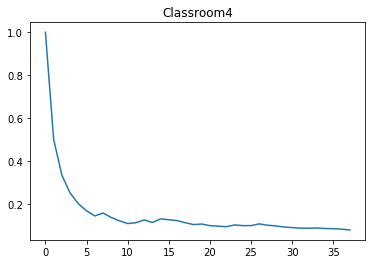

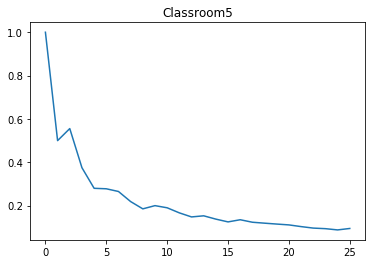

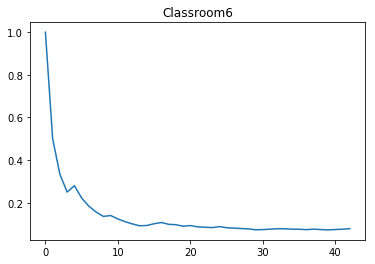

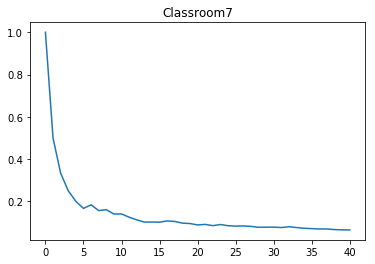

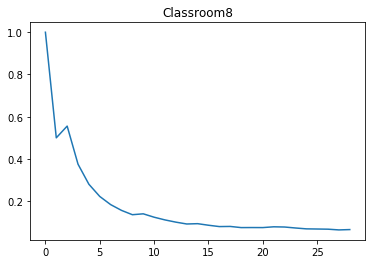

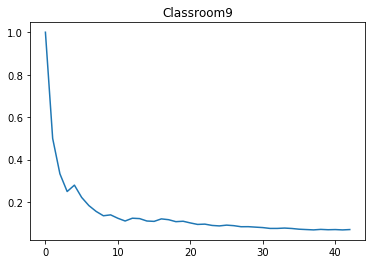

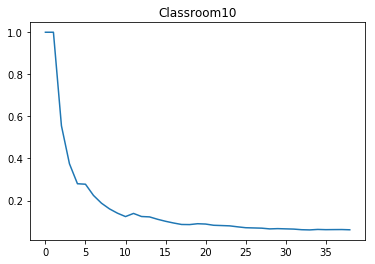

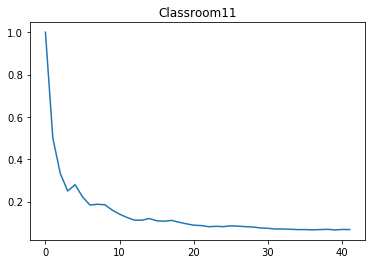

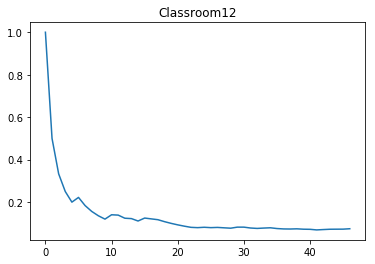

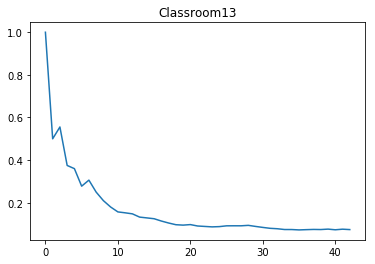

In [10]:
for i in range(13):
    plt.plot(range(len(classroom_list[i].diversity_list)),classroom_list[i].diversity_list)
    plt.title("Classroom"+str(i+1))
    plt.show()

In [11]:
classroom_list[1].diversity_list

[1.0,
 0.5,
 0.33333333333333331,
 0.25,
 0.20000000000000001,
 0.16666666666666669,
 0.18367346938775508,
 0.1875,
 0.18518518518518517,
 0.16,
 0.17355371900826447,
 0.15277777777777779,
 0.14792899408284024,
 0.1326530612244898,
 0.12,
 0.125,
 0.13494809688581316,
 0.12962962962962962,
 0.14127423822714683,
 0.13,
 0.12018140589569161,
 0.11157024793388429,
 0.10775047258979206,
 0.10069444444444443,
 0.097600000000000006,
 0.097633136094674555,
 0.097393689986282575,
 0.096938775510204092,
 0.098692033293697967,
 0.097777777777777783,
 0.094693028095733628,
 0.08984375,
 0.085399449035812688,
 0.086505190311418692,
 0.084081632653061206,
 0.081790123456790126,
 0.079620160701241768]

In [12]:
classroom_list[1].choice_list

[8,
 3,
 11,
 19,
 4,
 14,
 14,
 4,
 19,
 10,
 14,
 6,
 11,
 15,
 9,
 19,
 14,
 8,
 14,
 12,
 1,
 16,
 12,
 7,
 15,
 8,
 12,
 11,
 19,
 4,
 6,
 17,
 13,
 11,
 1,
 17,
 3]

       0         1
0    7.0  1.000000
1    6.0  0.500000
2   11.0  0.333333
3    9.0  0.250000
4   11.0  0.280000
5   15.0  0.222222
6    2.0  0.183673
7    2.0  0.187500
8   20.0  0.160494
9   15.0  0.160000
10  11.0  0.173554
11  11.0  0.194444
12  16.0  0.171598
13  18.0  0.153061
14  19.0  0.137778
15   4.0  0.125000
16   6.0  0.121107
17   5.0  0.111111
18  19.0  0.108033
19   9.0  0.105000
20  11.0  0.115646
21  17.0  0.107438
22  13.0  0.100189
23   6.0  0.100694
24   6.0  0.104000
25  15.0  0.103550
26   7.0  0.100137
27   5.0  0.096939
28   6.0  0.101070
29  20.0  0.097778
30   8.0  0.092612


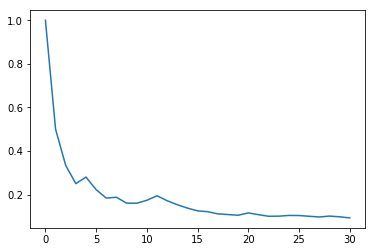

In [13]:
df = pd.DataFrame([classroom_list[2].choice_list,classroom_list[2].diversity_list]).T
print(df)
plt.plot(range(len(classroom_list[2].diversity_list)),classroom_list[2].diversity_list)
plt.show()